| Feature Name       | Type          | Description                                      | Business Meaning |
|--------------------|---------------|--------------------------------------------------|------------------|
| customerID         | Object        | Unique ID for each customer                      | Used for identification only; not useful for modeling |
| gender             | Categorical   | Customer gender (Male/Female)                    | Minor behavioral differences; not a strong churn driver |
| SeniorCitizen      | Numerical     | 1 = age 65+, 0 = otherwise                       | Older customers may show different loyalty patterns |
| Partner            | Categorical   | Whether the customer has a partner               | Married customers tend to be more stable |
| Dependents         | Categorical   | Whether the customer has dependents              | Customers with families often have lower churn |
| tenure             | Numerical     | Number of months the customer stayed             | One of the strongest churn indicators; low tenure = high churn |
| PhoneService       | Categorical   | Whether phone service is included                | Customers with more services tend to stay longer |
| MultipleLines      | Categorical   | Whether customer has multiple phone lines        | Indicates higher engagement with the company |
| InternetService    | Categorical   | DSL, Fiber optic, or No internet                 | Fiber optic often shows higher churn due to pricing/performance |
| OnlineSecurity     | Categorical   | Internet security add-on                         | Add-on services increase loyalty |
| OnlineBackup       | Categorical   | Online backup service                            | Another loyalty-increasing add-on |
| DeviceProtection   | Categorical   | Device protection plan                           | Offers extra value & reduces churn probability |
| TechSupport        | Categorical   | Technical support add-on                         | Lack of support strongly correlates with churn |
| StreamingTV        | Categorical   | Streaming TV service                             | More services = lower churn |
| StreamingMovies    | Categorical   | Streaming movies service                         | Adds customer dependency on provider |
| Contract           | Categorical   | Month-to-month, 1 year, 2 years                  | Strongest churn driver: month-to-month = highest churn |
| PaperlessBilling   | Categorical   | Whether billing is electronic                    | Often correlated with higher churn |
| PaymentMethod      | Categorical   | Payment type (electronic check, credit card...)  | Electronic check customers churn more |
| MonthlyCharges     | Numerical     | Monthly payment amount                            | Higher charges may increase churn likelihood |
| TotalCharges       | Numerical     | Total paid since joining (requires cleaning)      | Indicates relationship age and payment history |
| Churn              | Target        | Whether customer left (Yes/No)                   | Main classification target |


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


In [6]:
df = pd.read_csv(r'C:\Users\samer\churn_project\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.tail().T

,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.replace('?',np.nan,inplace=True)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
df['TotalCharges'].isnull().sum()

np.int64(11)

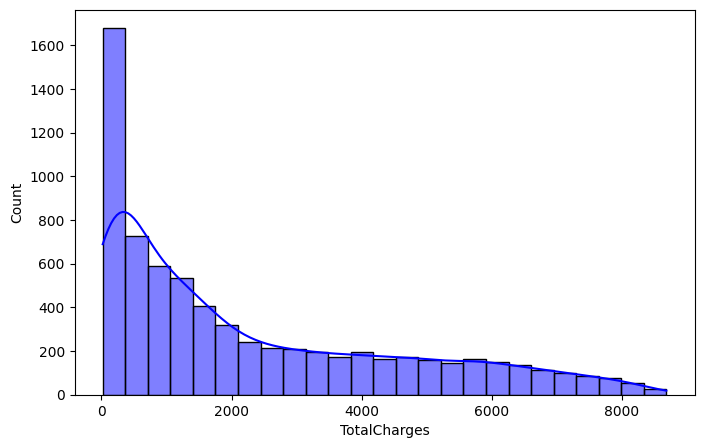

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['TotalCharges'],kde=True,color='blue')
plt.show()

In [43]:
df_median = df.copy()
df_knn = df.copy()
df_iter = df.copy()

In [44]:
#Simple Imputer (Median)
median_imp = SimpleImputer(strategy='median')
df_median['TotalCharges'] = median_imp.fit_transform(df_median[['TotalCharges']])

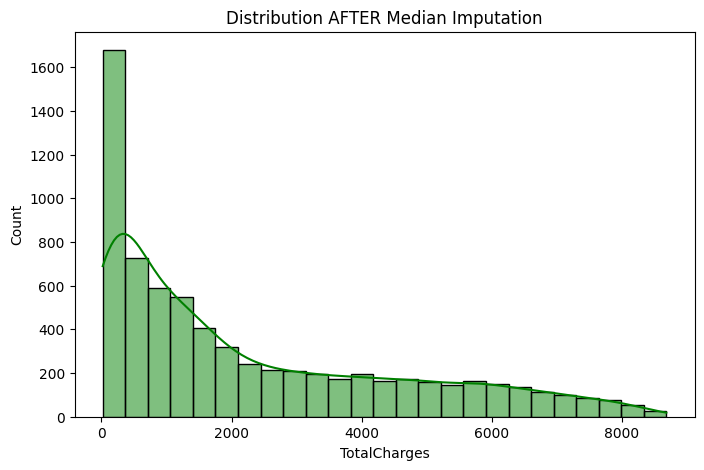

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df_median['TotalCharges'], kde=True, color='green')
plt.title("Distribution AFTER Median Imputation")
plt.show()

In [46]:
#KNN imputer
knn_imp = KNNImputer(n_neighbors=5)
df_knn['TotalCharges']=knn_imp.fit_transform(df_knn[['TotalCharges']])

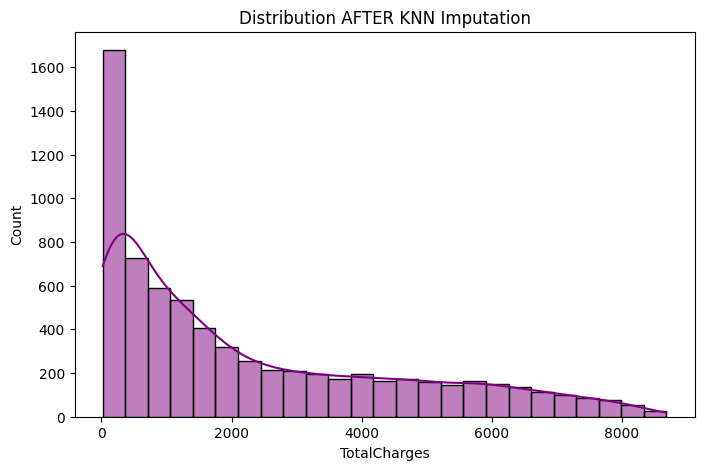

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df_knn['TotalCharges'], kde=True, color='purple')
plt.title("Distribution AFTER KNN Imputation")
plt.show()


In [48]:
#iterative imputer
iter_imputer = IterativeImputer(max_iter=20, random_state=42)
df_iter['TotalCharges'] = iter_imputer.fit_transform(df_iter[['TotalCharges']])

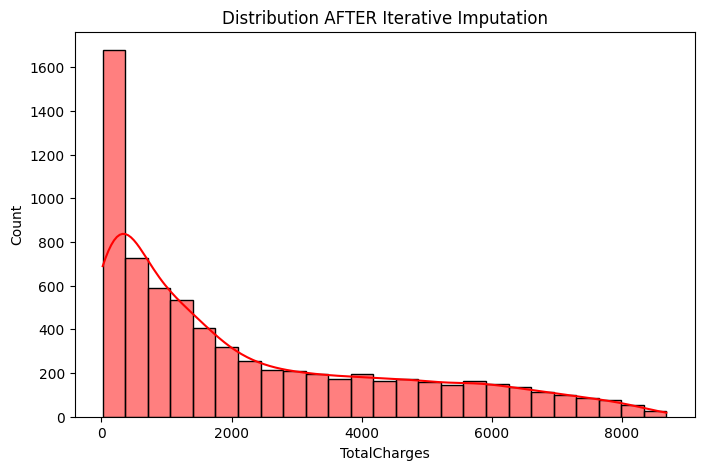

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df_iter['TotalCharges'], kde=True, color='red')
plt.title("Distribution AFTER Iterative Imputation")
plt.show()


In [50]:
df_ml=df_iter.copy()

In [51]:
yes_no_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in yes_no_cols:
    df_ml[col] = df_ml[col].map({'Yes':1, 'No':0})

In [52]:
df_ml['gender'] = df_ml['gender'].map({'Male': 1, 'Female': 0})


In [53]:
df_ml.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,0.0,1.0,1.0,1.0,0.0


In [54]:
internet_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df_ml[internet_services] = df_ml[internet_services].fillna(0)


In [55]:
df_ml.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C:\Users\samer\AppData\Local\Temp\ipykernel_13668\2601811541.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ml, x=col, palette='Set2')
C:\Users\samer\AppData\Local\Temp\ipykernel_13668\2601811541.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ml, x=col, palette='Set2')
C:\Users\samer\AppData\Local\Temp\ipykernel_13668\2601811541.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ml, x=col, palette='Set2')
C:\Users\samer\AppData\Local\Temp\ipykernel_13668\2601811541.py:7: FutureWarning: 

Passing `pale

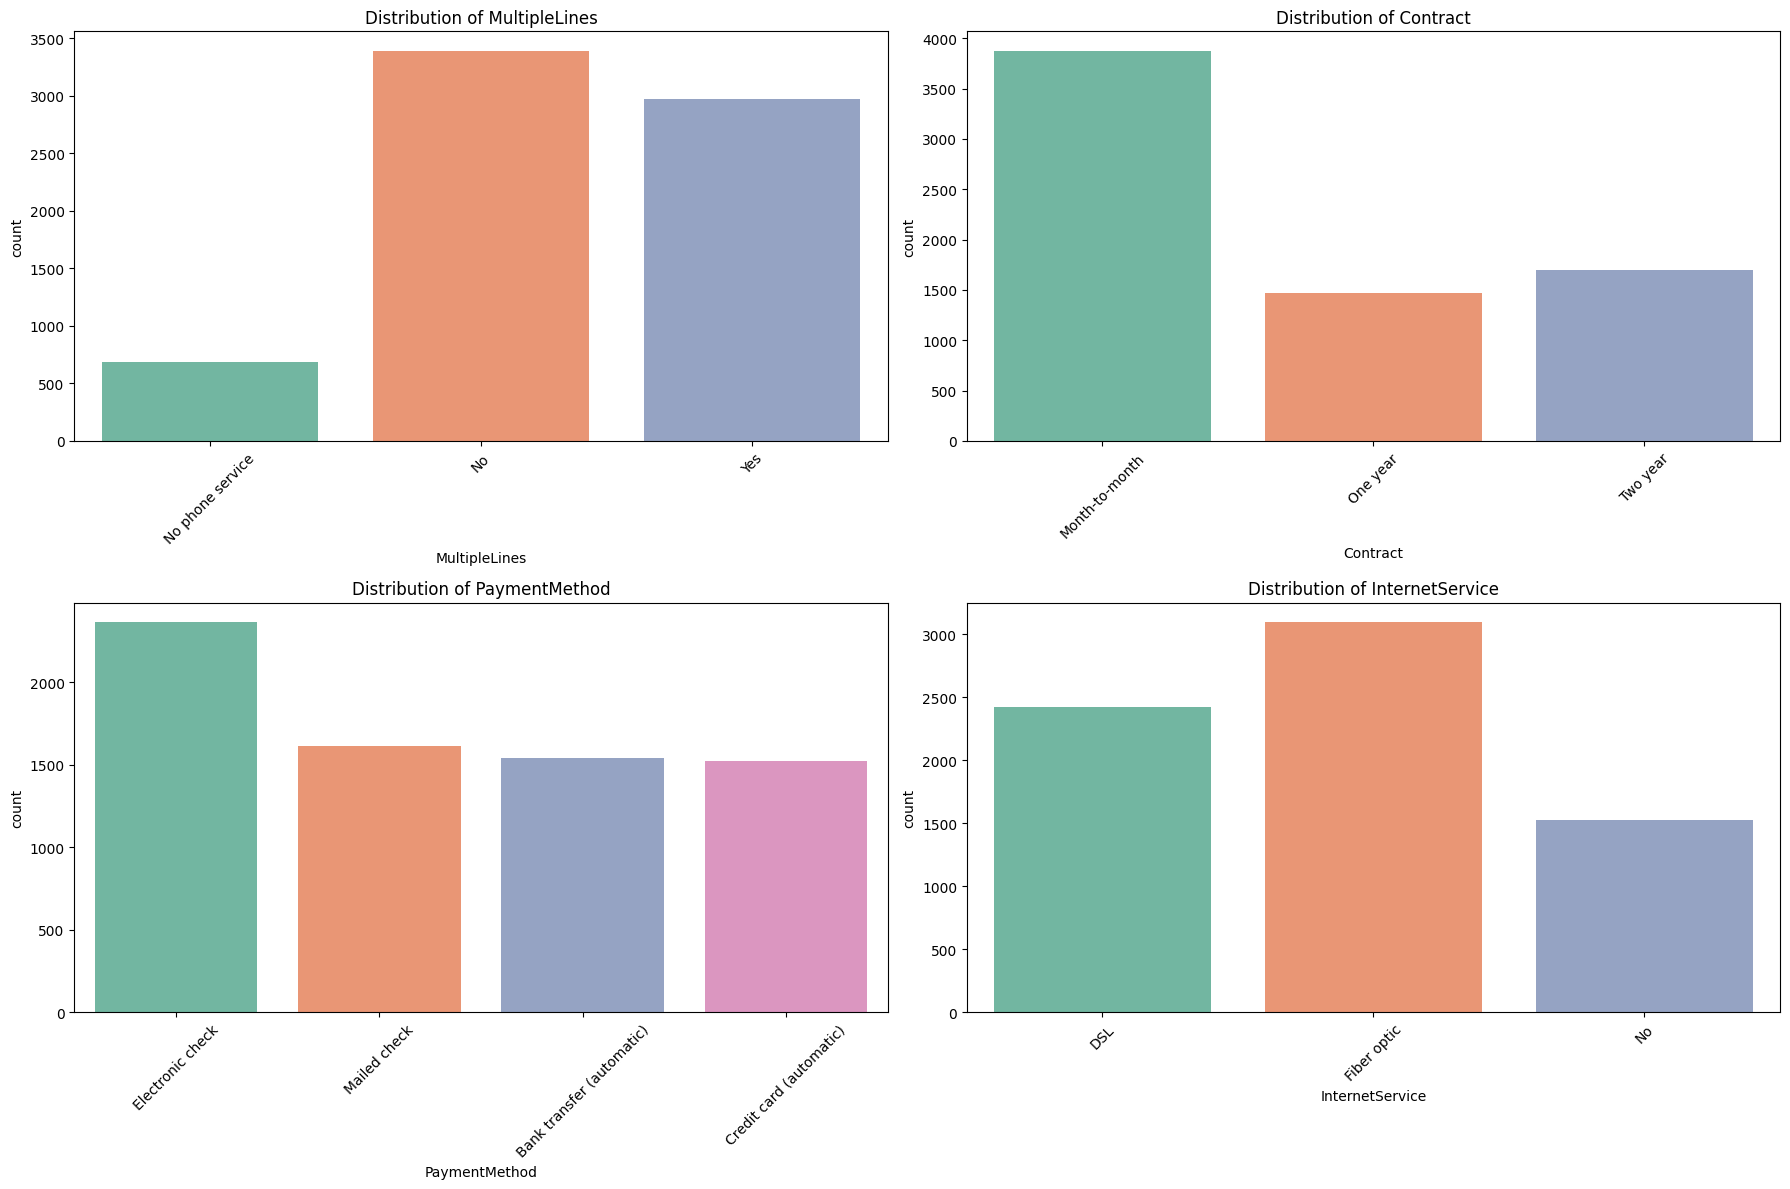

In [56]:
cat_cols = ['MultipleLines', 'Contract', 'PaymentMethod', 'InternetService']

plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_ml, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [57]:
cat_cols = ['MultipleLines','InternetService','Contract','PaymentMethod']
df_ml = pd.get_dummies(df_ml, columns=cat_cols, drop_first=True)


In [58]:
df_ml.head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
OnlineSecurity,0.0,1.0,1.0,1.0,0.0
OnlineBackup,1.0,0.0,1.0,0.0,0.0
DeviceProtection,0.0,1.0,0.0,1.0,0.0


In [59]:
df_ml.isnull().sum()

customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMeth

In [60]:
df_ml = df_ml.drop('customerID', axis=1)


In [61]:
bool_cols = df_ml.select_dtypes(include='bool').columns
df_ml[bool_cols] = df_ml[bool_cols].astype(int)


In [62]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   float64
 7   OnlineBackup                           7043 non-null   float64
 8   DeviceProtection                       7043 non-null   float64
 9   TechSupport                            7043 non-null   float64
 10  StreamingTV                            7043 non-null   float64
 11  Stre

In [63]:
df_ml.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [64]:
service_cols = [
    'PhoneService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'MultipleLines_Yes'
]

df_ml['TotalServicesCount'] = df_ml[service_cols].sum(axis=1)


In [66]:
df_ml["IsNewCustomer"] = (df_ml["tenure"] < 6).astype(int)


In [67]:
df_ml["IsLongCustomer"] = (df_ml["tenure"] > 24).astype(int)


In [68]:
df_ml["LTV"] = df_ml["tenure"] * df_ml["MonthlyCharges"]


In [ ]:
df_ml["InternetType"] = 1 
df_ml.loc[df_ml["InternetService_Fiber optic"] == 1, "InternetType"] = 2
df_ml.loc[df_ml["InternetService_No"] == 1, "InternetType"] = 0


In [70]:
df_ml["Fiber_Monthly"] = (
    df_ml["InternetService_Fiber optic"] * df_ml["MonthlyCharges"]
)


In [71]:
df_ml["TenureServicesScore"] = (
    df_ml["tenure"] * df_ml["TotalServicesCount"]
)


In [72]:
df_ml.head().T

,0,1,2,3,4
gender,0.00,1.00,1.00,1.00,0.00
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
Partner,1.00,0.00,0.00,0.00,0.00
Dependents,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
PhoneService,0.00,1.00,1.00,0.00,1.00
OnlineSecurity,0.00,1.00,1.00,1.00,0.00
OnlineBackup,1.00,0.00,1.00,0.00,0.00
DeviceProtection,0.00,1.00,0.00,1.00,0.00
TechSupport,0.00,0.00,0.00,1.00,0.00


In [73]:
df_ml.shape

(7043, 33)

In [74]:
df_corr=df_ml.drop('Churn',axis=1)
cor=df_corr.corr()

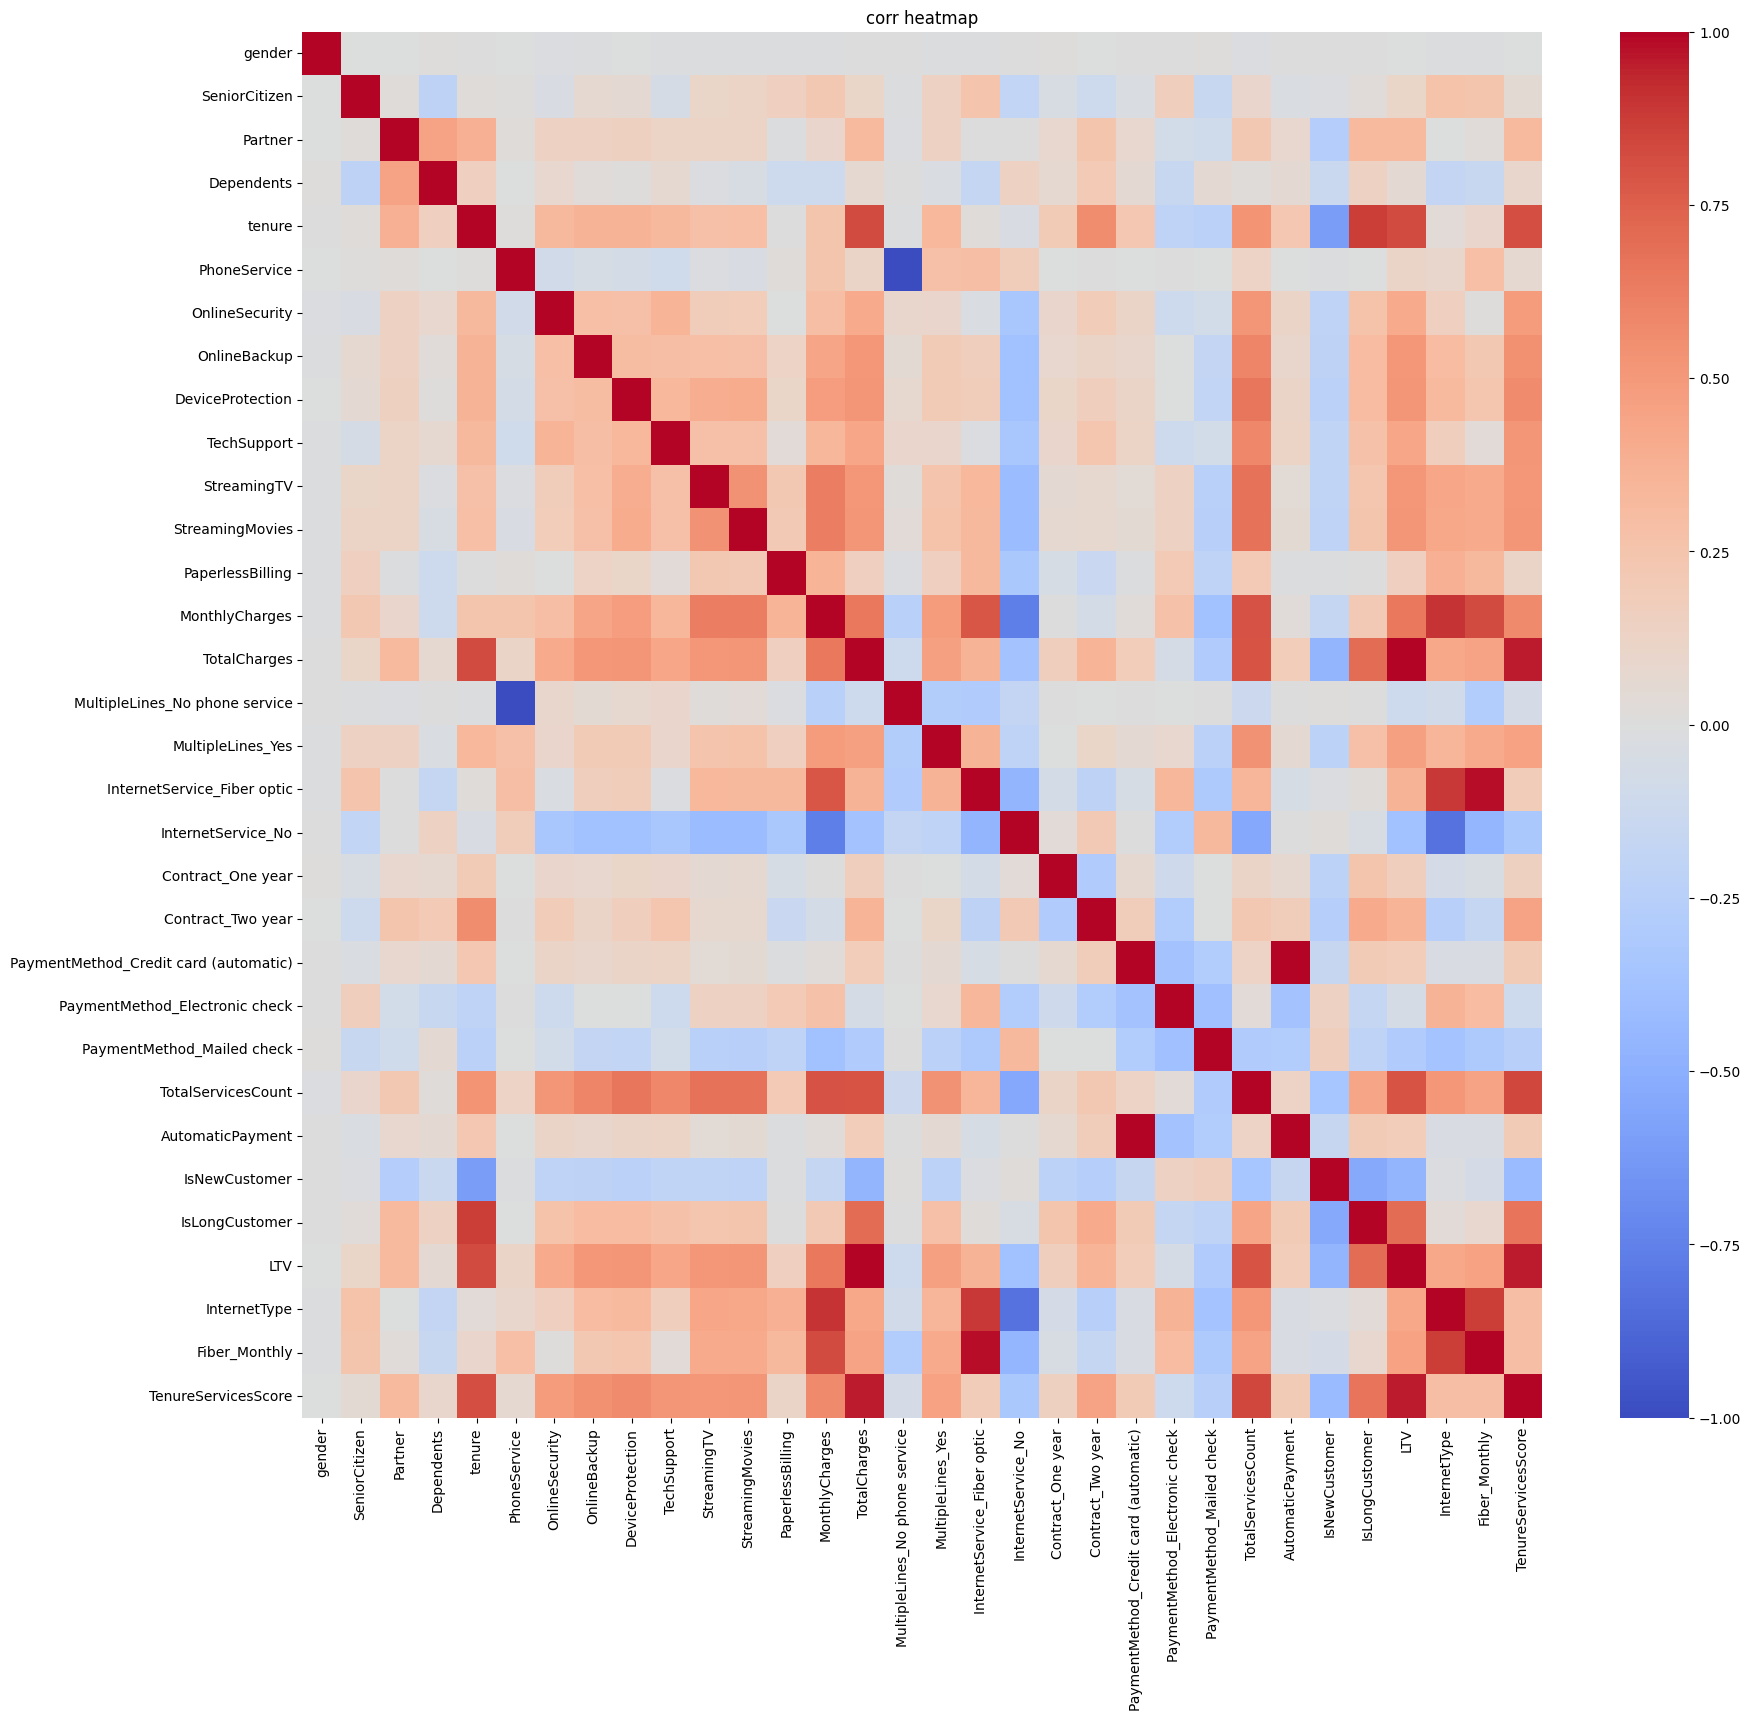

In [75]:
plt.figure(figsize=(20,18))
sns.heatmap(cor, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("corr heatmap")
plt.show()

In [76]:
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalServicesCount,AutomaticPayment,IsNewCustomer,IsLongCustomer,LTV,InternetType,Fiber_Monthly,TenureServicesScore
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.017021,-0.013773,-0.002105,-0.009212,...,0.000752,0.013744,-0.016825,0.001215,0.003571,0.001293,-0.000029,-0.010380,-0.010835,-0.004634
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,-0.038653,0.066572,0.059428,-0.060625,...,0.171718,-0.153477,0.095946,-0.024135,-0.017808,0.025131,0.103261,0.259390,0.248907,0.054609
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.143106,0.141498,0.153786,0.119999,...,-0.083852,-0.095125,0.219571,0.082029,-0.269995,0.315794,0.317462,-0.000132,0.030022,0.318384
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,0.080972,0.023671,0.013963,0.063268,...,-0.150642,0.059071,0.020933,0.060267,-0.132876,0.132984,0.062290,-0.179631,-0.150295,0.090392
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.327203,0.360277,0.360653,0.324221,...,-0.208363,-0.233852,0.523600,0.233006,-0.603413,0.868069,0.826568,0.033230,0.094246,0.817533
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.092893,-0.052312,-0.071227,-0.096340,...,0.003062,-0.003319,0.127255,-0.007721,-0.008780,-0.001770,0.113336,0.093720,0.285168,0.064018
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,1.000000,0.283832,0.275438,0.354931,...,-0.112338,-0.080798,0.522362,0.115721,-0.209371,0.263651,0.411816,0.156799,0.013852,0.487794
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.283832,1.000000,0.303546,0.294233,...,-0.000408,-0.174164,0.599838,0.090785,-0.214886,0.307123,0.509754,0.307420,0.220818,0.541527
DeviceProtection,-0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.275438,0.303546,1.000000,0.333313,...,-0.003351,-0.187373,0.659331,0.111554,-0.233633,0.308419,0.521748,0.313603,0.241460,0.569137
TechSupport,-0.009212,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.354931,0.294233,0.333313,1.000000,...,-0.114839,-0.085509,0.584471,0.117272,-0.202180,0.271730,0.431817,0.164833,0.036605,0.519560


In [77]:
churn_corr = df_ml.corr()['Churn'].sort_values(ascending=False)
print(churn_corr)


Churn                                    1.000000
InternetType                             0.316846
IsNewCustomer                            0.308773
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Fiber_Monthly                            0.272422
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection                        -0.066160
TotalServicesCount                      -0.067264
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
AutomaticPayment                        -0.134302


In [80]:
y_target=df_ml['Churn']
mic=mutual_info_classif(df_corr,y_target,random_state=42)
mi_ser = pd.Series(mic, index=df_corr.columns).sort_values(ascending=False)

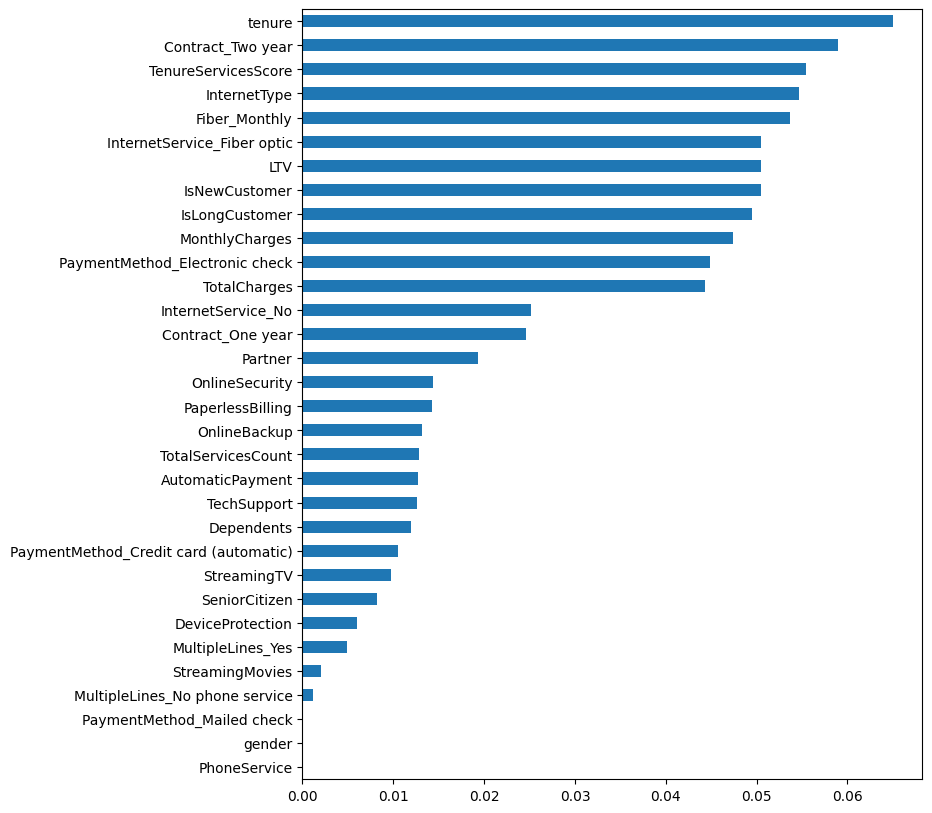

In [81]:
mi_ser.sort_values().plot(kind='barh', figsize=(8,10))
plt.show()

In [82]:
top_features = mi_ser.head(28).index
top_features

Index(['tenure', 'Contract_Two year', 'TenureServicesScore', 'InternetType',
       'Fiber_Monthly', 'InternetService_Fiber optic', 'LTV', 'IsNewCustomer',
       'IsLongCustomer', 'MonthlyCharges', 'PaymentMethod_Electronic check',
       'TotalCharges', 'InternetService_No', 'Contract_One year', 'Partner',
       'OnlineSecurity', 'PaperlessBilling', 'OnlineBackup',
       'TotalServicesCount', 'AutomaticPayment', 'TechSupport', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'StreamingTV', 'SeniorCitizen',
       'DeviceProtection', 'MultipleLines_Yes', 'StreamingMovies'],
      dtype='object')

In [83]:
x_top=df_corr[top_features]
model = LogisticRegression(max_iter=5000)
cv = StratifiedKFold(n_splits=5)

In [84]:
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

In [85]:
rfecv.fit(x_top, y_target)


,estimator,LogisticRegre...max_iter=5000)
,step,1
,min_features_to_select,1
,cv,StratifiedKFo...shuffle=False)
,scoring,'roc_auc'
,verbose,0
,n_jobs,-1
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001


In [86]:
rfecv.n_features_

np.int64(26)

In [87]:
list(x_top.columns[rfecv.support_])

['tenure',
 'Contract_Two year',
 'TenureServicesScore',
 'InternetType',
 'Fiber_Monthly',
 'InternetService_Fiber optic',
 'IsNewCustomer',
 'IsLongCustomer',
 'MonthlyCharges',
 'PaymentMethod_Electronic check',
 'InternetService_No',
 'Contract_One year',
 'Partner',
 'OnlineSecurity',
 'PaperlessBilling',
 'OnlineBackup',
 'TotalServicesCount',
 'AutomaticPayment',
 'TechSupport',
 'Dependents',
 'PaymentMethod_Credit card (automatic)',
 'StreamingTV',
 'SeniorCitizen',
 'DeviceProtection',
 'MultipleLines_Yes',
 'StreamingMovies']

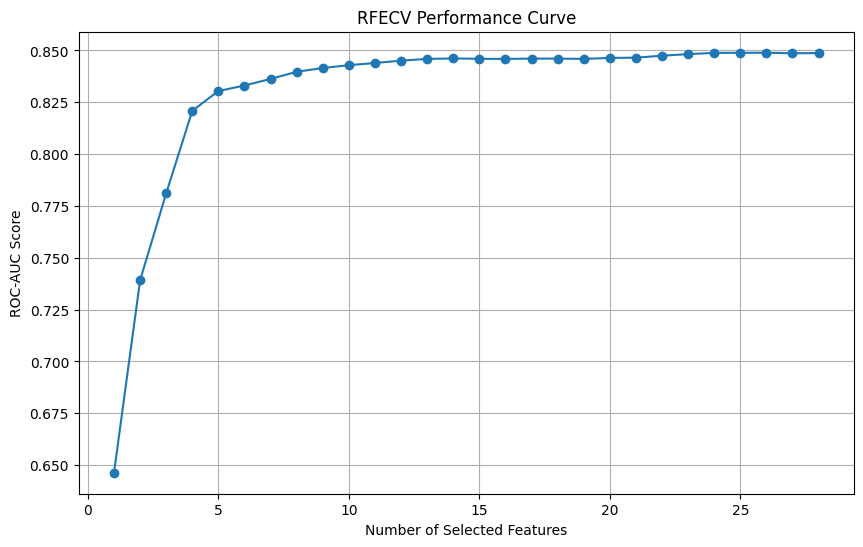

In [88]:
mean_scores = np.mean(rfecv.cv_results_['mean_test_score'].reshape(-1, 1), axis=1)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(mean_scores) + 1), mean_scores, marker='o')

plt.xlabel("Number of Selected Features")
plt.ylabel("ROC-AUC Score")
plt.title("RFECV Performance Curve")
plt.grid(True)
plt.show()

In [89]:
data_model=x_top[x_top.columns[rfecv.support_]]

In [90]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   Contract_Two year                      7043 non-null   int64  
 2   TenureServicesScore                    7043 non-null   float64
 3   InternetType                           7043 non-null   int64  
 4   Fiber_Monthly                          7043 non-null   float64
 5   InternetService_Fiber optic            7043 non-null   int64  
 6   IsNewCustomer                          7043 non-null   int64  
 7   IsLongCustomer                         7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   PaymentMethod_Electronic check         7043 non-null   int64  
 10  InternetService_No                     7043 non-null   int64  
 11  Cont

In [91]:
df_std  = data_model.copy()
df_min  = data_model.copy()
df_rob  = data_model.copy()

In [92]:
std_scaler = StandardScaler()
min_scaler = MinMaxScaler()
rob_scaler = RobustScaler()

In [95]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TenureServicesScore',
                'Fiber_Monthly','TotalServicesCount']

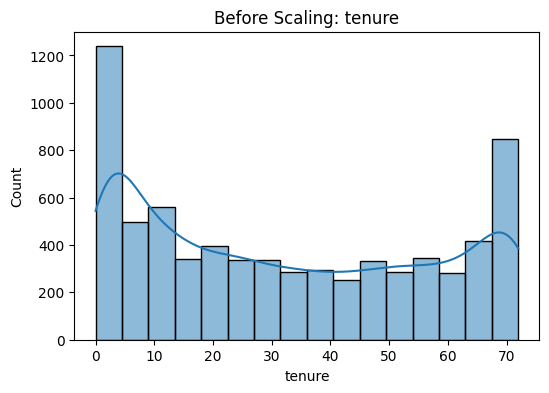

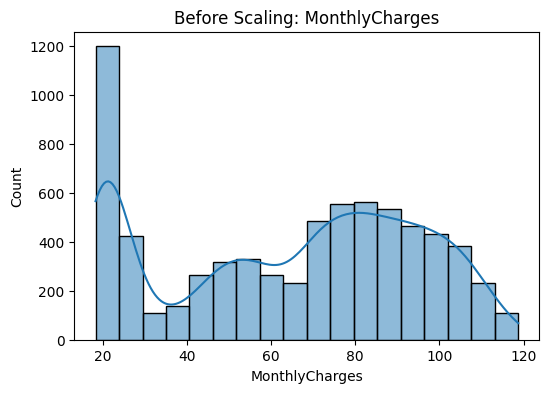

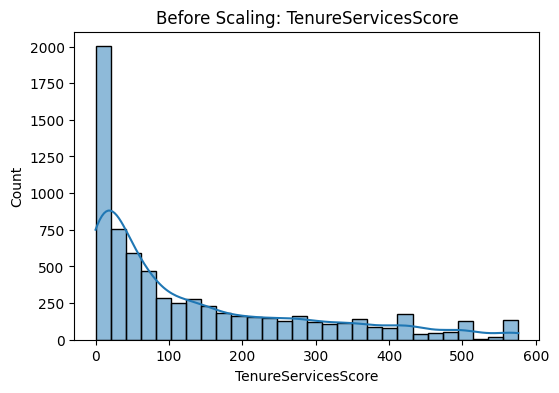

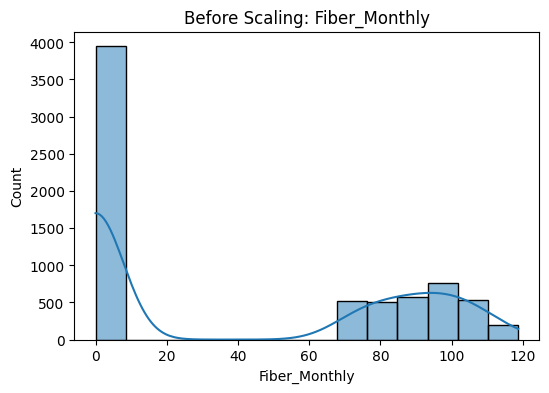

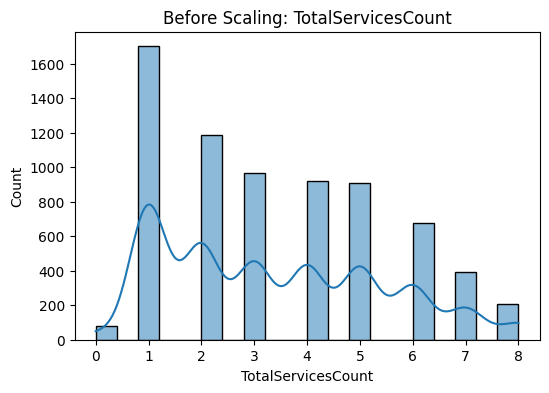

In [97]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data_model[col], kde=True)
    plt.title(f"Before Scaling: {col}")
    plt.show()

In [98]:
#StandardScaler
df_std[numeric_cols] = std_scaler.fit_transform(df_std[numeric_cols])

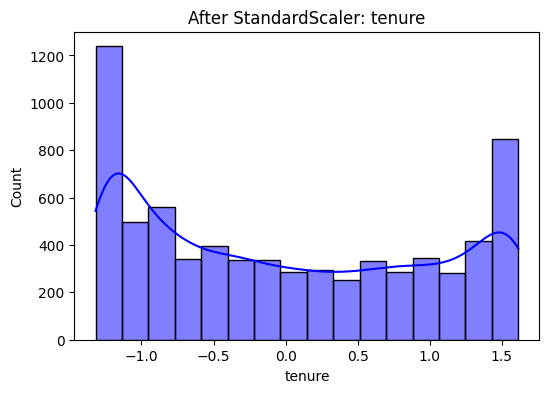

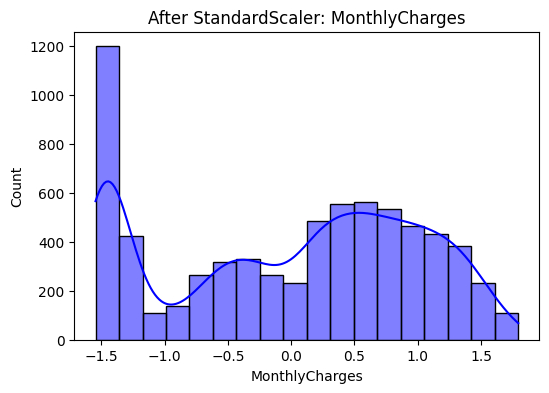

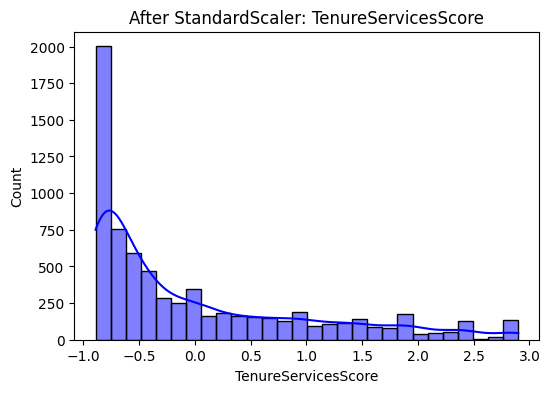

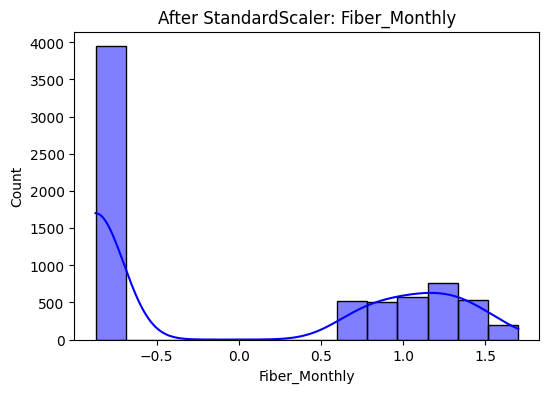

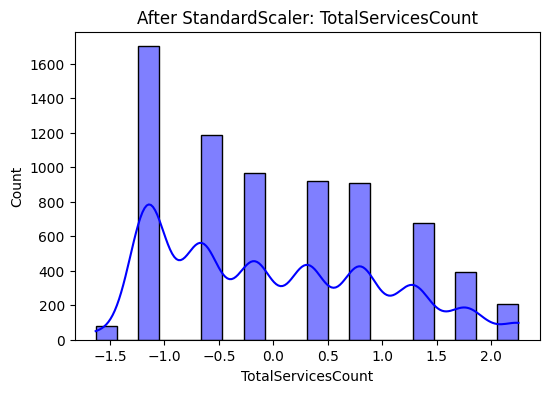

In [99]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_std[col], kde=True, color='blue')
    plt.title(f"After StandardScaler: {col}")
    plt.show()


In [100]:
#minmaxscaler
df_min[numeric_cols] = min_scaler.fit_transform(df_min[numeric_cols])

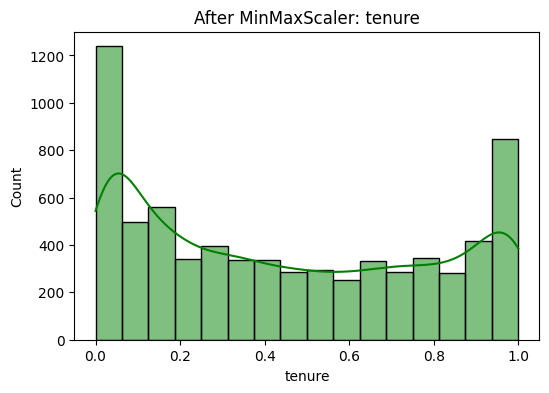

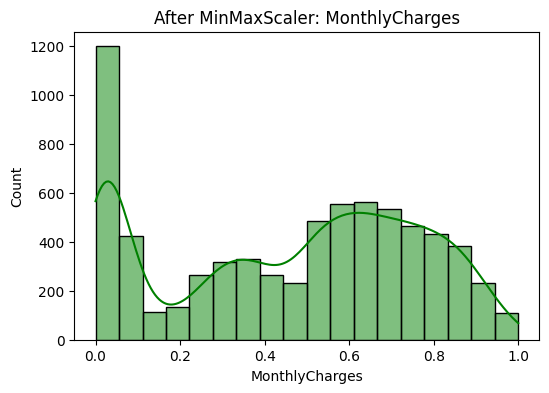

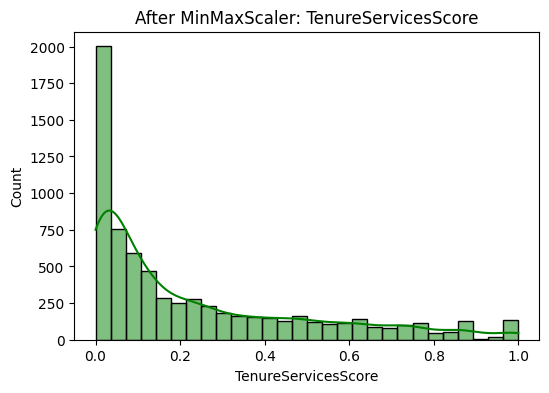

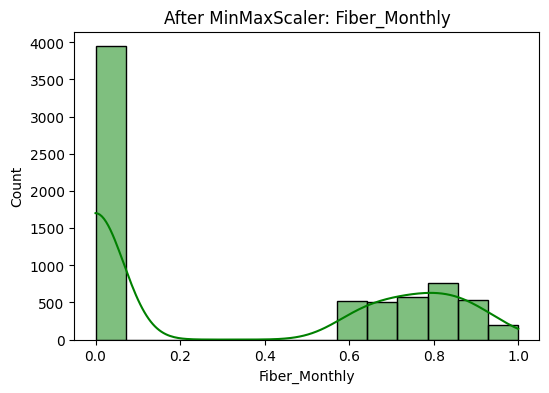

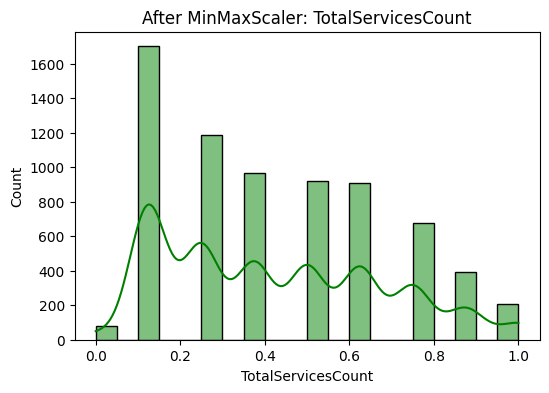

In [101]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_min[col], kde=True, color='green')
    plt.title(f"After MinMaxScaler: {col}")
    plt.show()


In [102]:
#RobustScaler
df_rob[numeric_cols] = rob_scaler.fit_transform(df_rob[numeric_cols])

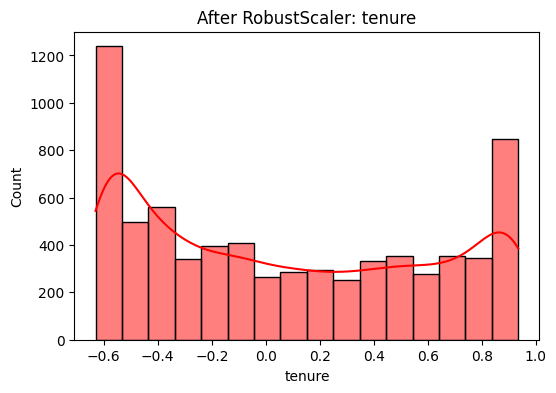

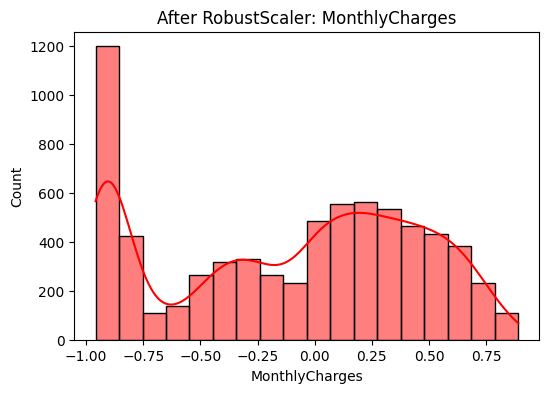

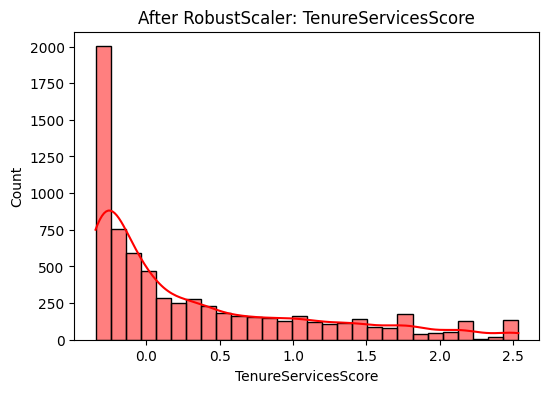

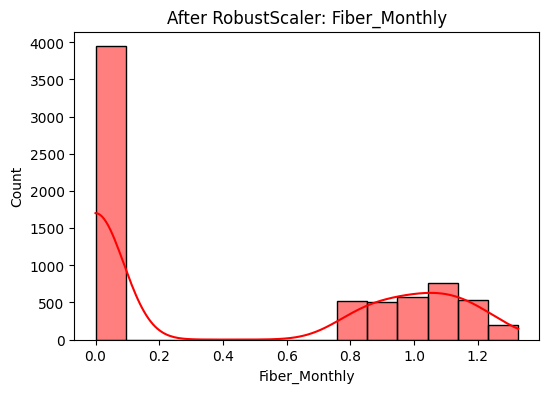

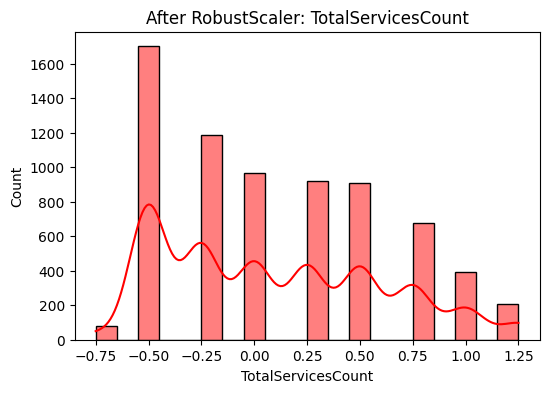

In [103]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_rob[col], kde=True, color='red')
    plt.title(f"After RobustScaler: {col}")
    plt.show()


In [ ]:
data_model.to_csv(r"enter your key", index=False)


In [107]:
data_model['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
data_model.to_csv('pleas enter your key', index=False)


In [109]:
data_model.head().T

,0,1,2,3,4
tenure,1.00,34.00,2.00,45.0,2.0
Contract_Two year,0.00,0.00,0.00,0.0,0.0
TenureServicesScore,1.00,102.00,6.00,135.0,2.0
InternetType,1.00,1.00,1.00,1.0,2.0
Fiber_Monthly,0.00,0.00,0.00,0.0,70.7
InternetService_Fiber optic,0.00,0.00,0.00,0.0,1.0
IsNewCustomer,1.00,0.00,1.00,0.0,1.0
IsLongCustomer,0.00,1.00,0.00,1.0,0.0
MonthlyCharges,29.85,56.95,53.85,42.3,70.7
PaymentMethod_Electronic check,1.00,0.00,0.00,0.0,1.0
